### Task description:
# Use two other FOXES setups (wake models) of your choice to calculate the yield again and
# plot the differences. Explain your results.

In [20]:
### approach: find out what wake models are available and how to creat them

### act like prior Tasks are done and simulate requiered variables (copy from lecture code)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import foxes
import foxes.variables as FV
import foxes.constants as FC

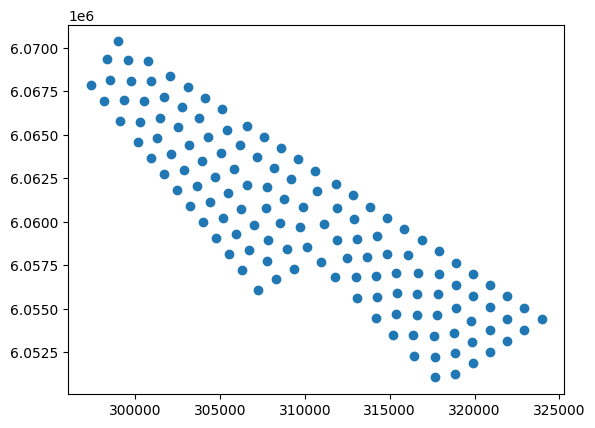

In [21]:
### explore layout data
area_geom_data = pd.read_csv('turbine-info/coordinates/area_of_interest/layout-N-10.1.geom.csv')
pos_x = np.array(area_geom_data['x'])
pos_y = np.array(area_geom_data['y'])

plt.scatter(pos_x, pos_y)
plt.show()

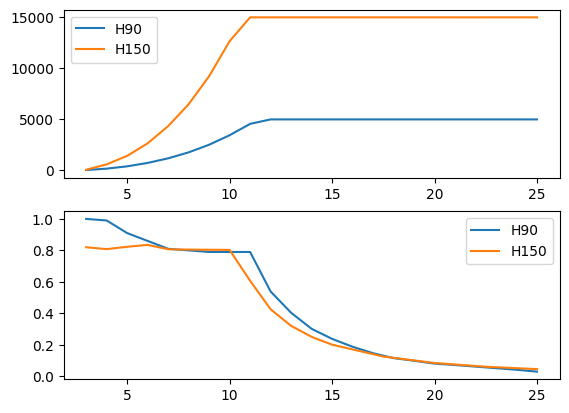

In [33]:
### explore power curve files 
higher_turbine_properties = pd.read_csv('turbine-info/power_curves/IEA-15MW-D240-H150.csv')
lower_turbine_properties = pd.read_csv('turbine-info/power_curves/NREL-5MW-D126-H90.csv')

fig, ax = plt.subplots(2,1)
ax[0].plot(lower_turbine_properties['ws'], lower_turbine_properties['P'])
ax[0].plot(higher_turbine_properties['ws'], higher_turbine_properties['P'])
ax[0].legend(['H90','H150'])

ax[1].plot(lower_turbine_properties['ws'], lower_turbine_properties['ct'])
ax[1].plot(higher_turbine_properties['ws'], higher_turbine_properties['ct'])
ax[1].legend(['H90','H150'])

In [35]:
### try to create a turbine model from given Data
mbook = foxes.models.ModelBook()

# read turbine specific performance data from one of the two options
# the turbines are of the same type as reported here: https://fraunhoferiwes.github.io/foxes.docs/notebooks/data.html#Power-and-thrust-curves
turbine_select = '90m'
if turbine_select == '150m':
    turbine_data_source = 'turbine-info/power_curves/IEA-15MW-D240-H150.csv'
elif turbine_select == '90m': 
    turbine_data_source = 'turbine-info/power_curves/NREL-5MW-D126-H90.csv'
else:
    turbine_data_source = None
    print('select a valid turbine identifier please')
    
mbook.turbine_types["my_turbine"] = foxes.models.turbine_types.PCtFile(turbine_data_source)

PCtFile(D=126.0, H=90.0, P_nominal=5000.0, P_unit=kW, rho=None, var_ws_ct=REWS2, var_ws_P=REWS3)

Turbine 0, T0: xy=(299005.80, 6070368.13), my_turbine
Turbine 1, T1: xy=(298349.95, 6069364.01), my_turbine
Turbine 2, T2: xy=(299546.60, 6069298.19), my_turbine
Turbine 3, T3: xy=(300744.40, 6069255.93), my_turbine
Turbine 4, T4: xy=(302075.57, 6068404.37), my_turbine
Turbine 5, T5: xy=(298529.18, 6068179.05), my_turbine
Turbine 6, T6: xy=(299725.82, 6068113.23), my_turbine
Turbine 7, T7: xy=(300923.62, 6068070.97), my_turbine
Turbine 8, T8: xy=(297371.96, 6067866.68), my_turbine
Turbine 9, T9: xy=(303085.54, 6067758.28), my_turbine
Turbine 10, T10: xy=(301715.50, 6067171.26), my_turbine
Turbine 11, T11: xy=(304095.51, 6067112.19), my_turbine
Turbine 12, T12: xy=(299341.24, 6066978.00), my_turbine
Turbine 13, T13: xy=(298142.83, 6066947.93), my_turbine
Turbine 14, T14: xy=(300539.04, 6066935.73), my_turbine
Turbine 15, T15: xy=(302771.25, 6066601.55), my_turbine
Turbine 16, T16: xy=(305105.47, 6066466.11), my_turbine
Turbine 17, T17: xy=(301478.71, 6065995.11), my_turbine
Turbine 18, 

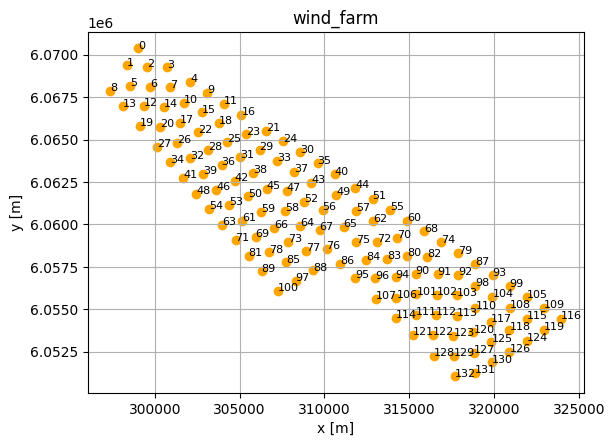

In [38]:
# setup a foxes WindFarm and implement the given data
test_farm = foxes.WindFarm(name="wind_farm")

# read layout of windfarm N10.1 and sort by position
layout_data = pd.read_csv('turbine-info/coordinates/area_of_interest/layout-N-10.1.geom.csv',index_col='Unnamed: 0').sort_values(by='y', ascending=False).reset_index(inplace=False)

# do not have a turbine model yet 
my_turbine = ["my_turbine"] 

# build layout data into foxes windFarm            
foxes.input.farm_layout.add_from_csv(test_farm,layout_data,turbine_models= my_turbine)
# see resulting layout
ax = foxes.output.FarmLayoutOutput(test_farm).get_figure()
plt.show()



In [31]:
foxes.input.states